# Assessing Risk using Inferential Statistics

As Risk measurement within the CAPM, the Beta-Factor reflects the sensitive of a particular security against its market volatility.

Since, we want to measure the development of the general risk and uncertainty level of Germany, bootsrapping allows to use resampled data to make statistical inferences. The other one is permutation which is a statistical method to derive whether or not the null hypothesis can be rejected based on the p-value.

**Statistics fundamentals:**

Before we get into the single steps of the statistical analysis of Beta-factors over time, I want to ensure some basic understanding of the applied methods and test statistics in question:

- The **null hypothesis** states that there is no relationship between the two variables being studied (one variable does not affect the other). It states the results are due to chance and are not significant in terms of supporting the idea being investigated.

- The **alternative hypothesis** states that the independent variable did affect the dependent variable, and the results are significant in terms of supporting the theory being investigated (i.e. not due to chance)

- A **p-value**, or probability value, is a number describing how likely it is that your data would have occurred by random chance (i.e. that the null hypothesis is true). The level of **statistical significance** is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

- **Hypothesis testing:**
testing a hypothesis is an assessment of how reasonable the observed data are assuming the hypothesis is true.

- **Test statistic:**
A test statistic is a single number that can be computed from observed data and also from data you simulate under the null hypothesis. It serves as a basis of comparison between what the hypothesis predicts and what we actually observed. Importantly, you should choose your test statistic to be something that is pertinent to the question you are trying to answer with your hypothesis test, in this case, are the two states different?

- **Standard Deviation**
Standard deviation is a descriptive statistic, which means it helps you to describe or summarize your dataset. It measures how much “spread” or variability there is within your dataset by how far each value within your dataset lies from the mean.

- **Standard Error (Variance)**
Standard error (or standard error of the mean) is an inferential statistic that tells you, in simple terms, how accurately your sample data represents the whole population. Different samples of the same population will give you different results, so it’s important to understand how applicable your findings are. So, when you take the mean results from your sample data and compare it with the overall population mean on a distribution, the standard error tells you what the variance is between the two means. In the case of high standard error, your sample data does not accurately represent the population data; the sample means are widely spread around the population mean.

# Bootstrapping Analyses

### Data Preprocessing

In [ ]:
# Load packages ################################################################
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import data ##################################################################
import pandas as pd
dax_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Promotion_Python/05_Risk_and_Uncertainty_Quantification/DAX_Screening_2020_0705.csv", sep = ";", decimal=",", error_bad_lines = False)

dax_df.head()


,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,Eigenkapitalquote_MKT,Fremdkapitalquote_MKT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins,Spalte12,Spalte5,Spalte6,Spalte7,Spalte8,Spalte3,Spalte4,Spalte2,Spalte1,Jahr2,WACC_calc_constDAI,WACC_calc_15YDAI,WACC_calc_10YDAI,WACC_calc_constMRP,WACC_GB_nSt.,WACC_GB_vSt2,Bilanzsumme_BW,Eigenkapital_BW,Fremdkapital_BW,EK-Quote_BW,FK-Quote_BW,Gesamtkapital_MKT,Marktkapitalisierung,FK-Kosten_bereinigt,EK-Quote_MKT,FK-Quote_MKT,Aktienanzahl,Aktienkurs,FK-Kosten_unbereinigt,Zinsaufwand,FK_zinstragend,EK-Kosten_MRP_konstant,EK-Kosten_10J_DAI,Beta2,Steuersaetze,Marktrendite_Mittel,Marktrendite_1Y,Marktrendite_10Y_DAI,Zinssatz_risikofrei,Investitionsquote,Umsatzerloese
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,NaN,0.326,0.674,0.0711,0.0585,0.04950,0.50,0.0410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,0.046478,0.046151,0.045662,0.050849,0.070,NaN,4427.0,1628.0,2799.0,0.367743,0.632257,4154.3485,1355.3485,0.067074,0.326248,0.673752,45.65,29.69,0.025473,71.3,1063.0,0.072750,0.076500,0.50,0.378,0.1048,0.073,0.073,0.0407,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,NaN,0.381,0.619,0.0716,0.0500,0.05717,0.51,0.0407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,0.044717,0.041026,0.047243,0.049924,0.081,NaN,5722.0,2684.0,3038.0,0.469067,0.530933,4907.6000,1869.6000,0.062606,0.380960,0.619040,46.74,40.00,0.024358,74.0,1182.0,0.070010,0.084086,0.51,0.337,0.1048,0.271,0.091,0.0338,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,NaN,0.581,0.419,0.0729,0.0687,0.06698,0.58,0.0338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,0.052556,0.057944,0.055250,0.061581,0.075,NaN,8372.0,2828.0,5544.0,0.337793,0.662207,13217.9047,7673.9047,0.067847,0.580569,0.419431,203.39,37.73,0.033189,184.0,2712.0,0.076660,0.089072,0.58,0.314,0.1048,0.220,0.086,0.0378,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,NaN,0.664,0.336,0.0397,0.0397,0.03925,0.03,0.0378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,0.043897,0.044335,0.043658,0.044430,0.075,NaN,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0234,10436.0234,0.074890,0.663573,0.336427,203.59,51.26,0.032130,170.0,2270.0,0.044175,0.044073,0.03,0.318,0.1048,0.223,0.066,0.0423,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,NaN,0.466,0.534,0.0712,0.0784,0.05391,0.49,0.0423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,0.055372,0.064057,0.036630,0.061497,0.083,NaN,9519.0,3386.0,6133.0,0.355710,0.644290,11494.7784,5361.7784,0.075046,0.466453,0.533547,197.56,27.14,0.033100,203.0,2705.0,0.071752,0.041617,0.49,0.288,0.1048,-0.404,-0.004,0.0400,0.093666,10799.0


In [ ]:
# Compute missing data as percentage ###########################################
for column in dax_df.columns:
  percentage = dax_df[column].isnull().mean()
  print(f"{column}: {round(percentage*100, 2)}%")

Unternehmen: 0.0%
Sektor: 0.0%
Industrie: 0.0%
Jahr: 0.0%
WACC_cMR: 0.0%
WACC_15yMR: 0.0%
WACC_10yMR: 0.0%
WACC_GB_nSt: 49.61%
WACC_GB_vSt: 73.14%
Eigenkapitalquote_MKT: 0.0%
 Fremdkapitalquote_MKT : 0.0%
CAPM_cMR: 0.0%
CAPM_15yMR: 0.0%
CAPM_10yMR: 0.0%
Beta: 0.0%
risikoloser Zins: 0.0%
Spalte12: 100.0%
Spalte5: 100.0%
Spalte6: 100.0%
Spalte7: 100.0%
Spalte8: 100.0%
Spalte3: 100.0%
Spalte4: 100.0%
Spalte2: 100.0%
Spalte1: 100.0%
Jahr2: 6.86%
WACC_calc_constDAI: 6.86%
WACC_calc_15YDAI: 6.86%
WACC_calc_10YDAI: 6.86%
WACC_calc_constMRP: 6.86%
WACC_GB_nSt.: 53.73%
WACC_GB_vSt2: 74.51%
Bilanzsumme_BW: 6.86%
Eigenkapital_BW: 6.86%
Fremdkapital_BW: 6.86%
EK-Quote_BW: 6.86%
FK-Quote_BW: 6.86%
Gesamtkapital_MKT: 6.86%
Marktkapitalisierung: 8.63%
FK-Kosten_bereinigt: 6.86%
EK-Quote_MKT: 6.86%
FK-Quote_MKT: 6.86%
Aktienanzahl: 8.63%
Aktienkurs: 8.63%
FK-Kosten_unbereinigt: 6.86%
Zinsaufwand: 6.86%
FK_zinstragend: 6.86%
EK-Kosten_MRP_konstant: 6.86%
EK-Kosten_10J_DAI: 6.86%
Beta2: 6.86%
Steuersaet

In [ ]:
# Subset des Data-frame ########################################################
betas = dax_df[["Unternehmen", "Sektor", "Industrie", "Jahr", "Beta"]]
betas.head()


,Unternehmen,Sektor,Industrie,Jahr,Beta
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.50
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.51
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.58
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.03
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.49


**Filter Betas < 0.1**

In [ ]:
# Filter for Betas < 0.1 -> not a realistic number #############################
betas_kl_null = betas[betas["Beta"] < 0.1
                      ]

print(betas_kl_null)

               Unternehmen              Sektor  ...  Jahr  Beta
3                Adidas AG   Consumer Cyclical  ...  2007  0.03
20              Allianz SE  Financial Services  ...  2007  0.09
71           Beiersdorf AG  Consumer Defensive  ...  2007  0.03
187       Deutsche Post AG         Industrials  ...  2007  0.04
323  Deutsche Lufthansa AG         Industrials  ...  2007 -0.12
405                 RWE AG           Utilities  ...  2008 -0.13
422                 SAP SE         Technology   ...  2008  0.03

[7 rows x 5 columns]


**Preprocessing of the data**

In [ ]:
# Finale Datenmanipulation vor Visualisierung ##################################
# Subset Dataframes für die Jahre 2004, 2008, 2012, 2016, 2020
betas_2004_df = betas.loc[betas["Jahr"] == 2004, ["Beta"]]
betas_2008_df = betas.loc[betas["Jahr"] == 2008, ["Beta"]]
betas_2012_df = betas.loc[betas["Jahr"] == 2012, ["Beta"]]
betas_2016_df = betas.loc[betas["Jahr"] == 2016, ["Beta"]]
betas_2020_df = betas.loc[betas["Jahr"] == 2020, ["Beta"]]

# Transformieren der df in np.array-Format
betas_2004 = betas_2004_df["Beta"].to_numpy()
betas_2008 = betas_2008_df["Beta"].to_numpy()
betas_2012 = betas_2012_df["Beta"].to_numpy()
betas_2016 = betas_2016_df["Beta"].to_numpy()
betas_2020 = betas_2020_df["Beta"].to_numpy()

## a) Univariate-Bootstrapping

**1) Definition of boostrap-replicates**

**Probability Density Function:** In a density plot, we attempt to visualize the underlying probability distribution of the data.

**`draw_bs_reps(data, func, size=1)`**, which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

In [ ]:
# Resampling function ##########################################################
def bootstrap_replicate_1d(data, func):
    """
    Purpose:
    ----------
    Generiert ein Resample der Stichprobe

    Arguments:
    ----------
    data = Sample of population, 
    i.e. 30 Betafactors of 2004
    func = Test-statistic based on sample
    i.e. Mean, Median, Variance

    Return:
    ----------
    func(bs_sample): Computed Test-statistic"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# FUnction, that produces Bootstrap of size n and computes Test-statistic,
# e.g. Mean, Median or Variance for each of the Bootstrap-Process 

def draw_bs_reps(data, func, size=1):
    """
    Purpose:
    ----------
    Generates an array of length of bootstrap processes
    and computes values of a particular Boostrap-Test-statistic
    
    Argumentes:
    ----------
    data = Sample of population, 
    i.e. 30 Betafactors of 2004
    func = Test-statistic based on sample
    i.e. Mean, Median, Variance
    size = Number of Boostrap-Processes

    Return:
    ----------
    bs_replicates = Array of length n -> n-Test-statistics
    """

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

**2) Compute Medians for 2004, 2008, 2012, 2016, 2020**

In [ ]:
median_2004 =np.median(betas_2004)
median_2008 =np.median(betas_2008)
median_2012 =np.median(betas_2012)
median_2016 =np.median(betas_2016)
median_2020 =np.median(betas_2020)

print("2004:", median_2004)
print("2008:", median_2008)
print("2012:", median_2012)
print("2016:", median_2016)
print("2020:", median_2020)

2004: 0.82
2008: 0.805
2012: 0.945
2016: 0.98
2020: 0.92


In [ ]:
print(f" Beta-Werte im Jahr 2004 aller 30 DAX-Unternehmen:\n{betas_2004}"
      f"\n\nAnzahl der Werte:\n{len(betas_2004)}")

 Beta-Werte im Jahr 2004 aller 30 DAX-Unternehmen:
[0.5  1.14 0.82 0.99 0.21 0.9  1.14 0.59 1.39 0.52 1.1  0.8  0.94 0.38
 0.55 0.62 0.46 0.23 1.43 1.07 0.56 0.52 1.13 0.54 0.53 1.53 1.42 0.95
 0.82 0.88]

Anzahl der Werte:
30


**3) Visualising Distribution Functions including Medians**

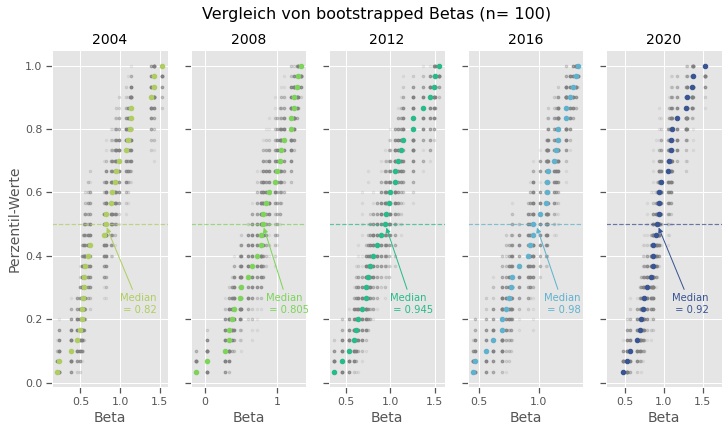

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt

 fig, ax = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (12, 6))
 
 # Compute BS-Replicate (Test-statistic) for Beta_2004 #########################
 for _ in range(100):
    # Generate Resamples: bs_samples
    bs_sample = np.random.choice(betas_2004, size=len(betas_2004))

    # Compute and Plot  ECDF-Curve based on bs_samples
    x, y = ecdf(bs_sample)
    ax[0].plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1, markersize = 5, label = "")


 # Compute BS-Replicate (Test-statistic) for Beta_2008 #########################
 for _ in range(100):
    # Generate Resamples: bs_samples
    bs_sample = np.random.choice(betas_2008, size=len(betas_2008))

    # Compute and Plot ECDF-Curve based on bs_samples
    x, y = ecdf(bs_sample)
    ax[1].plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1, markersize = 5, label = "")
    

# Compute BS-Replicate for Beta_2012 ###########################################
 for _ in range(100):
    # Generate Resamples: bs_samples
    bs_sample = np.random.choice(betas_2012, size=len(betas_2012))

    # Compute and Plot ECDF-Curve based on bs_samples
    x, y = ecdf(bs_sample)
    ax[2].plot(x, y, marker='.', linestyle='none',
               color='gray', alpha=0.1, markersize = 5, label = "")


# Compute BS-Replicate for Beta_2016 ###########################################
 for _ in range(100):
    # Generate Resamples: bs_samples
    bs_sample = np.random.choice(betas_2016, size=len(betas_2016))

    # Compute and Plot ECDF-Curve based on bs_samples
    x, y = ecdf(bs_sample)
    ax[3].plot(x, y, marker='.', linestyle='none',
               color='gray', alpha=0.1, markersize = 5, label = "")
    

# Compute BS-Repcliate for Beta_2020 ###########################################
 for _ in range(100):
    # Generate Resamples: bs_samples
    bs_sample = np.random.choice(betas_2020, size=len(betas_2020))

    # Compute and Plot ECDF-Curve based on bs_samples
    x, y = ecdf(bs_sample)
    ax[4].plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1, markersize = 5, label = "")


# Plot ECDF from original data
ax[0].plot(x_04, y_04, marker='.', markersize = 9, linestyle = "none", color = "#AFCE60")
ax[1].plot(x_08, y_08, marker='.', markersize = 9, linestyle = "none", color = "#7CD559")
ax[2].plot(x_12, y_12, marker='.', markersize = 9, linestyle = "none", color = "#27BB8A")
ax[3].plot(x_16, y_16, marker='.', markersize = 9, linestyle = "none", color = "#5FB2CF")
ax[4].plot(x_20, y_20, marker='.', markersize = 9, linestyle = "none", color = "#385492")

ax[0].axhline(y = 0.5, color = "#AFCE60", linestyle = "--", linewidth = 1.2, alpha = 0.75)
ax[1].axhline(y = 0.5, color = "#7CD559", linestyle = "--", linewidth = 1.2, alpha = 0.75)
ax[2].axhline(y = 0.5, color = "#27BB8A", linestyle = "--", linewidth = 1.2, alpha = 0.75)
ax[3].axhline(y = 0.5, color = "#5FB2CF", linestyle = "--", linewidth = 1.2, alpha = 0.75)
ax[4].axhline(y = 0.5, color = "#385492", linestyle = "--", linewidth = 1.2, alpha = 0.75)


# Make margins and label axes
plt.margins(0.2)
ax[0].set_ylabel("Perzentil-Werte", fontsize = 14)

ax[0].set_xlabel("Beta", fontsize = 14)
ax[1].set_xlabel("Beta", fontsize = 14)
ax[2].set_xlabel("Beta", fontsize = 14)
ax[3].set_xlabel("Beta", fontsize = 14)
ax[4].set_xlabel("Beta", fontsize = 14)

ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2008", fontsize = 14)
ax[2].set_title("2012", fontsize = 14)
ax[3].set_title("2016", fontsize = 14)
ax[4].set_title("2020", fontsize = 14)

# Make Annotations using arrow
ax[0].annotate(f"Median\n = {median_2004}",xy = (0.822, 0.495), xytext = (1.0, 0.22), color = "#AFCE60", fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"#AFCE60"}) # Arrow
ax[1].annotate(f"Median\n = {median_2008}",xy = (0.807, 0.495), xytext = (0.85, 0.22), color = "#7CD559", fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"#7CD559"}) # Arrow
ax[2].annotate(f"Median\n = {median_2012}",xy = (0.947, 0.495), xytext = (1.0, 0.22), color = "#27BB8A", fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"#27BB8A"}) # Arrow
ax[3].annotate(f"Median\n = {median_2016}",xy = (0.982, 0.495), xytext = (1.05, 0.22), color = "#5FB2CF", fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"#5FB2CF"}) # Arrow
ax[4].annotate(f"Median\n = {median_2020}",xy = (0.922, 0.495), xytext = (1.1, 0.22), color = "#385492", fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"#385492"}) # Arrow

fig.suptitle("Vergleich von bootstrapped Betas (n= 100)", fontsize = 16)

# Show the plot
plt.subplots_adjust(bottom = 0.1)
plt.show()

In [ ]:
print("Mean of betas_2004 =", round(np.mean(betas_2004), 3))
print("Mean of betas_2008 =", round(np.mean(betas_2008), 3))
print("Mean of betas_2012 =", round(np.mean(betas_2012), 3))
print("Mean of betas_2016 =", round(np.mean(betas_2016), 3))
print("Mean of betas_2020 =", round(np.mean(betas_2020), 3))

Mean of betas_2004 = 0.822
Mean of betas_2008 = 0.78
Mean of betas_2012 = 0.952
Mean of betas_2016 = 0.954
Mean of betas_2020 = 0.941


In [ ]:
# Median of boostrapped Betafaktoren ###########################################
print("Median of betas_2004 =", np.median(betas_2004))
print("Median of betas_2008 =", np.median(betas_2008))
print("Median of betas_2012 =", np.median(betas_2012))
print("Median of betas_2016 =", np.median(betas_2016))
print("Median of betas_2020 =", np.median(betas_2020))

Median of betas_2004 = 0.82
Median of betas_2008 = 0.805
Median of betas_2012 = 0.945
Median of betas_2016 = 0.98
Median of betas_2020 = 0.92


### Mean-PDF using Bootstrapping

Measure the distribution of beta factor means using PDF charts.

The probability density function is a derivative of the distribution function, which characterizes the density with which the values of the random variable are distributed at a given point.

**Mittelwert-Replikate und PDFs**

1. Berechnung der Mittelwert-Replikate
2. Plotting dieser durch Histogramme

In [ ]:
# Drawing Bootstrap-Replicates of Betas in 2004, 2008, 2012, 2016 2020: 
# bs_replicates using np.mean
bs_reps_mean_2004 = draw_bs_reps(betas_2004, np.mean, size = 10000)
bs_reps_mean_2008 = draw_bs_reps(betas_2008, np.mean, size = 10000)
bs_reps_mean_2012 = draw_bs_reps(betas_2012, np.mean, size = 10000)
bs_reps_mean_2016 = draw_bs_reps(betas_2016, np.mean, size = 10000)
bs_reps_mean_2020 = draw_bs_reps(betas_2020, np.mean, size = 10000)

In [ ]:
# Computing Medians of Bootstrap-Means
print("Median von Mean-Betas in 2004 =", round(np.median(bs_reps_mean_2004), 3))
print("Median von Mean-Betas in 2008 =", round(np.median(bs_reps_mean_2008), 3))
print("Median von Mean-Betas in 2012 =", round(np.median(bs_reps_mean_2012), 3))
print("Median von Mean-Betas in 2016 =", round(np.median(bs_reps_mean_2016), 3))
print("Median von Mean-Betas in 2020 =", round(np.median(bs_reps_mean_2020), 3))

Median von Mean-Betas in 2004 = 0.822
Median von Mean-Betas in 2008 = 0.782
Median von Mean-Betas in 2012 = 0.951
Median von Mean-Betas in 2016 = 0.955
Median von Mean-Betas in 2020 = 0.941


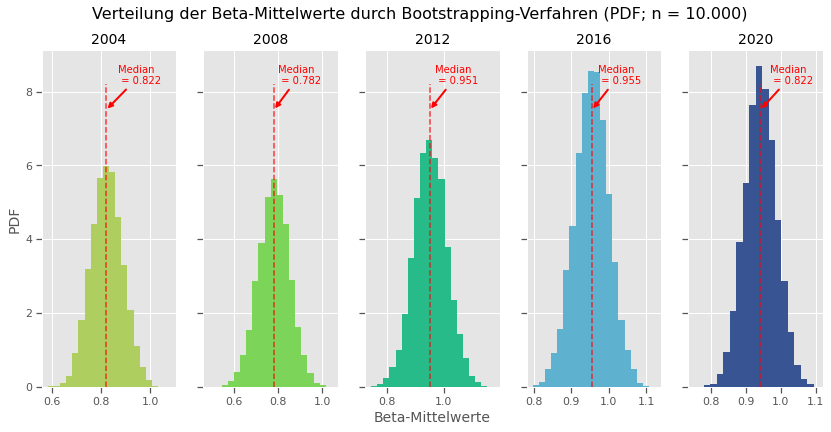

In [ ]:
# Plot the 5 PDFs ##############################################################
fig, ax = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (14, 6))

counts_04, bins = np.histogram(bs_reps_mean_2004)

# Plot Histogram using density-parameter = True ################################
ax[0].hist(bs_reps_mean_2004, bins = 20, color = "#AFCE60", density = True)
ax[1].hist(bs_reps_mean_2008, bins = 20, color = "#7CD559", density = True)
ax[2].hist(bs_reps_mean_2012, bins = 20, color = "#27BB8A", density = True)
ax[3].hist(bs_reps_mean_2016, bins = 20, color = "#5FB2CF", density = True)
ax[4].hist(bs_reps_mean_2020, bins = 20, color = "#385492", density = True)

ax[0].axvline(x = np.median(bs_reps_mean_2004), ymax = 0.9, color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[1].axvline(x = np.median(bs_reps_mean_2008), ymax = 0.9, color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[2].axvline(x = np.median(bs_reps_mean_2012), ymax = 0.9, color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[3].axvline(x = np.median(bs_reps_mean_2016), ymax = 0.9, color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[4].axvline(x = np.median(bs_reps_mean_2020), ymax = 0.9, color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)


# Define Margins and Labels ####################################################
plt.margins(0.02)

ax[0].set_ylabel("PDF", fontsize = 14)
ax[2].set_xlabel("Beta-Mittelwerte", fontsize = 14)

ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2008", fontsize = 14)
ax[2].set_title("2012", fontsize = 14)
ax[3].set_title("2016", fontsize = 14)
ax[4].set_title("2020", fontsize = 14)

# Make Annotations using arrow #################################################
ax[0].annotate(f"Median\n = {round(np.median(bs_reps_mean_2004), 3)}",xy = (0.820, 7.5), xytext = (0.87, 8.2), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[1].annotate(f"Median\n = {round(np.median(bs_reps_mean_2008), 3)}",xy = (0.781, 7.5), xytext = (0.8, 8.2), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[2].annotate(f"Median\n = {round(np.median(bs_reps_mean_2012), 3)}",xy = (0.950, 7.5), xytext = (0.97, 8.2), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[3].annotate(f"Median\n = {round(np.median(bs_reps_mean_2016), 3)}",xy = (0.955, 7.5), xytext = (0.97, 8.2), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[4].annotate(f"Median\n = {round(np.median(bs_reps_mean_2004), 3)}",xy = (0.941, 7.5), xytext = (0.97, 8.2), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil

fig.suptitle("Verteilung der Beta-Mittelwerte durch Bootstrapping-Verfahren (PDF; n = 10.000)", fontsize = 16)

# Show the plot
plt.subplots_adjust(bottom = 0.1)
plt.show()

**Density parameter**
If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

### Variance-PDF using Bootstrapping

Measure the distribution of variance of beta factors using PDF charts.

**Variance-Replicates and PDFs**

1. Compute Variance-Replicates
2. Plot them using histograms

1. Compute Variance-Replicates

In [ ]:
# Draw bootstrap replicates of betas in 2004, 2014, 2020 (equal to tau): bs_replicates
bs_reps_var_2004 = draw_bs_reps(betas_2004, np.var, size = 10000)
bs_reps_var_2008 = draw_bs_reps(betas_2008, np.var, size = 10000)
bs_reps_var_2012 = draw_bs_reps(betas_2012, np.var, size = 10000)
bs_reps_var_2016 = draw_bs_reps(betas_2016, np.var, size = 10000)
bs_reps_var_2020 = draw_bs_reps(betas_2020, np.var, size = 10000)


2. Compute Medians of Variance-Betas

In [ ]:
# Determine Median of all three histograms
print("Median von Varianz-Betas in 2004:", round(np.median(bs_reps_var_2004), 3))
print("Median von Varianz-Betas in 2008:", round(np.median(bs_reps_var_2008), 3))
print("Median von Varianz-Betas in 2012:", round(np.median(bs_reps_var_2012), 3))
print("Median von Varianz-Betas in 2016:", round(np.median(bs_reps_var_2016), 3))
print("Median von Varianz-Betas in 2020:", round(np.median(bs_reps_var_2020), 3))

Median von Varianz-Betas in 2004: 0.121
Median von Varianz-Betas in 2008: 0.143
Median von Varianz-Betas in 2012: 0.097
Median von Varianz-Betas in 2016: 0.061
Median von Varianz-Betas in 2020: 0.063


3. Plot Varianz-Betas after Bootstrapping

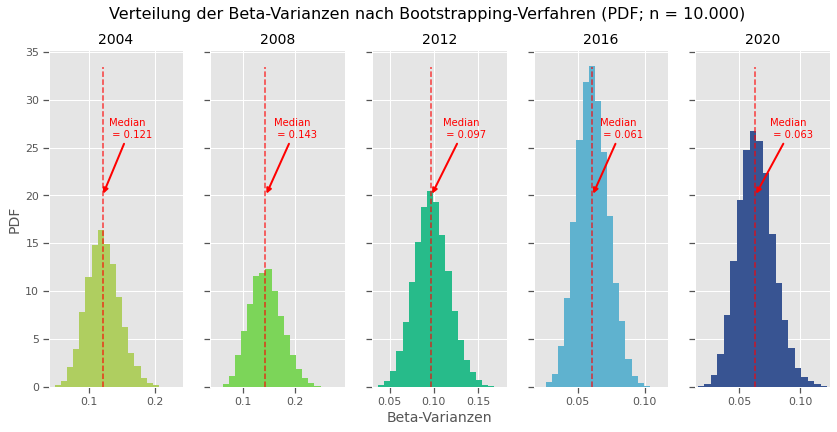

In [ ]:
#Plotting all three histograms of the Beta-mean
fig, ax = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (14, 6))

#counts_04, bins = np.histogram(bs_reps_var_2004)

# Plot ECDF from original data
ax[0].hist(bs_reps_var_2004, bins = 20, color = "#AFCE60", density = True)
ax[1].hist(bs_reps_var_2008, bins = 20, color = "#7CD559", density = True)
ax[2].hist(bs_reps_var_2012, bins = 20, color = "#27BB8A", density = True)
ax[3].hist(bs_reps_var_2016, bins = 20, color = "#5FB2CF", density = True)
ax[4].hist(bs_reps_var_2020, bins = 20, color = "#385492", density = True)

ax[0].axvline(x = np.median(bs_reps_var_2004), color = "red", ymax = 0.95, linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[1].axvline(x = np.median(bs_reps_var_2008), color = "red", ymax = 0.95, linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[2].axvline(x = np.median(bs_reps_var_2012), color = "red", ymax = 0.95, linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[3].axvline(x = np.median(bs_reps_var_2016), color = "red", ymax = 0.95, linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[4].axvline(x = np.median(bs_reps_var_2020), color = "red", ymax = 0.95, linestyle = "--", linewidth = 1.5, alpha = 0.75)


# Make margins and label axes
plt.margins(0.02)
#ax[0].set_xlabel("Varianz von bootstrapped Beta", fontsize = 14)
ax[0].set_ylabel("PDF", fontsize = 14)

#ax[1].set_xlabel("Varianz von bootstrapped Beta", fontsize = 14)
ax[2].set_xlabel("Beta-Varianzen", fontsize = 14)

ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2008", fontsize = 14)
ax[2].set_title("2012", fontsize = 14)
ax[3].set_title("2016", fontsize = 14)
ax[4].set_title("2020", fontsize = 14)

#ax[0].set_xlim(0.6, 1.3)
#ax[1].set_xlim(0.6, 1.3)
#ax[2].set_xlim(0.6, 1.3)

# Make Annotations using arrow
ax[0].annotate(f"Median\n = {round(np.median(bs_reps_var_2004), 3)}",xy = (0.121, 20), xytext = (0.13, 26), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[1].annotate(f"Median\n = {round(np.median(bs_reps_var_2008), 3)}",xy = (0.144, 20), xytext = (0.16, 26), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[2].annotate(f"Median\n = {round(np.median(bs_reps_var_2012), 3)}",xy = (0.097, 20), xytext = (0.11, 26), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[3].annotate(f"Median\n = {round(np.median(bs_reps_var_2016), 3)}",xy = (0.061, 20), xytext = (0.067, 26), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[4].annotate(f"Median\n = {round(np.median(bs_reps_var_2020), 3)}",xy = (0.063, 20), xytext = (0.075, 26), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil

fig.suptitle("Verteilung der Beta-Varianzen nach Bootstrapping-Verfahren (PDF; n = 10.000)", fontsize = 16)


# Show the plot
plt.subplots_adjust(bottom = 0.1)
plt.show()


**a) Confidence-intervals of Beta-means after Bootstrapping**

In [ ]:
# Compute the 95% confidence interval: conf_int
ci_mean_2004 = np.percentile(bs_reps_mean_2004, [2.5, 97.5])
ci_mean_2008 = np.percentile(bs_reps_mean_2008, [2.5, 97.5])
ci_mean_2012 = np.percentile(bs_reps_mean_2012, [2.5, 97.5])
ci_mean_2016 = np.percentile(bs_reps_mean_2016, [2.5, 97.5])
ci_mean_2020 = np.percentile(bs_reps_mean_2020, [2.5, 97.5])

# Print confidence intervals
print('Das 95%-Konfidenzinterval von Mean-Betas in 2004 liegt zwischen', round(ci_mean_2004[0], 3), "(LCL) und", 
      round(ci_mean_2004[1], 3), "(UCL)")
print('Das 95%-Konfidenzinterval von Mean-Betas in 2014 liegt zwischen', round(ci_mean_2008[0], 3), "(LCL) und", 
      round(ci_mean_2008[1], 3), "(UCL)")
print('Das 95%-Konfidenzinterval von Mean-Betas in 2020 liegt zwischen', round(ci_mean_2012[0], 3), "(LCL) und", 
      round(ci_mean_2012[1], 3), "(UCL)")
print('Das 95%-Konfidenzinterval von Mean-Betas in 2014 liegt zwischen', round(ci_mean_2016[0], 3), "(LCL) und", 
      round(ci_mean_2016[1], 3), "(UCL)")
print('Das 95%-Konfidenzinterval von Mean-Betas in 2020 liegt zwischen', round(ci_mean_2020[0], 3), "(LCL) und", 
      round(ci_mean_2020[1], 3), "(UCL)")

Das 95%-Konfidenzinterval von Mean-Betas in 2004 liegt zwischen 0.698 (LCL) und 0.95 (UCL)
Das 95%-Konfidenzinterval von Mean-Betas in 2014 liegt zwischen 0.638 (LCL) und 0.918 (UCL)
Das 95%-Konfidenzinterval von Mean-Betas in 2020 liegt zwischen 0.837 (LCL) und 1.069 (UCL)
Das 95%-Konfidenzinterval von Mean-Betas in 2014 liegt zwischen 0.862 (LCL) und 1.043 (UCL)
Das 95%-Konfidenzinterval von Mean-Betas in 2020 liegt zwischen 0.852 (LCL) und 1.032 (UCL)


**b) Confidence-intervals of Beta-variances after Boostrapping**

In [ ]:
# Compute the 95% confidence interval: conf_int
ci_var_2004 = np.percentile(bs_reps_var_2004, [2.5, 97.5])
ci_var_2008 = np.percentile(bs_reps_var_2008, [2.5, 97.5])
ci_var_2012 = np.percentile(bs_reps_var_2012, [2.5, 97.5])
ci_var_2016 = np.percentile(bs_reps_var_2016, [2.5, 97.5])
ci_var_2020 = np.percentile(bs_reps_var_2020, [2.5, 97.5])

# Print confidence intervals
print('Das 95%-Konfidenzinterval von Variance-Betas in 2004 liegt zwischen', round(ci_var_2004[0], 3), "(LCL) und", 
      round(ci_var_2004[1], 3), "(UCL)")
print('Das 95%-Konfidenzinterval von Variance-Betas in 2008 liegt zwischen', round(ci_var_2008[0], 3), "(LCL) und", 
      round(ci_var_2008[1], 3), "(UCL)")
print('Das 95%-Konfidenzinterval von Variance-Betas in 2012 liegt zwischen', round(ci_var_2012[0], 3), "(LCL) und", 
      round(ci_var_2012[1], 3), "(UCL)")
print('Das 95%-Konfidenzinterval von Variance-Betas in 2016 liegt zwischen', round(ci_var_2016[0], 3), "(LCL) und", 
      round(ci_var_2016[1], 3), "(UCL)")
print('Das 95%-Konfidenzinterval von Variance-Betas in 2020 liegt zwischen', round(ci_var_2020[0], 3), "(LCL) und", 
      round(ci_var_2020[1], 3), "(UCL)")

Das 95%-Konfidenzinterval von Variance-Betas in 2004 liegt zwischen 0.076 (LCL) und 0.173 (UCL)
Das 95%-Konfidenzinterval von Variance-Betas in 2008 liegt zwischen 0.088 (LCL) und 0.21 (UCL)
Das 95%-Konfidenzinterval von Variance-Betas in 2012 liegt zwischen 0.06 (LCL) und 0.138 (UCL)
Das 95%-Konfidenzinterval von Variance-Betas in 2016 liegt zwischen 0.039 (LCL) und 0.085 (UCL)
Das 95%-Konfidenzinterval von Variance-Betas in 2020 liegt zwischen 0.036 (LCL) und 0.095 (UCL)


**c) Compute Mean-differences, Bootstrap-replicates and Confidence-intervals**

Die Mean-Differenzen are computed against baseline-year "2020, i.e.:
- 2004 ~ 2020
- 2008 ~ 2020
- etc.

The idea behind this is to make year-to-year changes visible and interpretable

In [ ]:
# Compute the difference of the sample means: mean_diff ########################
mean_diff_0420 = np.mean(betas_2020) - np.mean(betas_2004)
mean_diff_0820 = np.mean(betas_2020) - np.mean(betas_2008)
mean_diff_1220 = np.mean(betas_2020) - np.mean(betas_2004)
mean_diff_1620 = np.mean(betas_2020) - np.mean(betas_2016)


# Get bootstrap replicates of means ############################################
mean_replicates_2004 = draw_bs_reps(betas_2004, np.mean, 10000)
mean_replicates_2008 = draw_bs_reps(betas_2008, np.mean, 10000)
mean_replicates_2012 = draw_bs_reps(betas_2012, np.mean, 10000)
mean_replicates_2016 = draw_bs_reps(betas_2016, np.mean, 10000)
mean_replicates_2020 = draw_bs_reps(betas_2020, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates ###################
mean_diff_replicates_0420 = mean_replicates_2020 - mean_replicates_2004
mean_diff_replicates_0820 = mean_replicates_2020 - mean_replicates_2008
mean_diff_replicates_1220 = mean_replicates_2020 - mean_replicates_2012
mean_diff_replicates_1620 = mean_replicates_2020 - mean_replicates_2016


# Compute 95% confidence interval: conf_int ####################################
ci_mean_0420 = np.percentile(mean_diff_replicates_0420, [2.5, 97.5])
ci_mean_0820 = np.percentile(mean_diff_replicates_0820, [2.5, 97.5])
ci_mean_1220 = np.percentile(mean_diff_replicates_1220, [2.5, 97.5])
ci_mean_1620 = np.percentile(mean_diff_replicates_1620, [2.5, 97.5])


# Print the results ############################################################
print(f"2020/2004: Difference of Means = {round(mean_diff_0420, 3)}")
print(f"2020/2004: 95%-Konfidenzintervall = {np.round(ci_mean_0420, 3)}\n")

print(f"2020/2008: Difference of Means = {round(mean_diff_0820, 3)}")
print(f"2020/2008: 95%-Konfidenzintervall = {np.round(ci_mean_0820, 3)}\n")

print(f"2020/2012: Difference of Means = {round(mean_diff_1220, 3)}")
print(f"2020/2012: 95%-Konfidenzintervall = {np.round(ci_mean_1220, 3)}\n")

print(f"2020/2016: Difference of Means = {round(mean_diff_1620, 3)}")
print(f"2020/2016: 95%-Konfidenzintervall = {np.round(ci_mean_1620, 3)}")

2020/2004: Difference of Means = 0.119
2020/2004: 95%-Konfidenzintervall = [-0.038  0.276]

2020/2008: Difference of Means = 0.16
2020/2008: 95%-Konfidenzintervall = [-0.003  0.326]

2020/2012: Difference of Means = 0.119
2020/2012: 95%-Konfidenzintervall = [-0.157  0.135]

2020/2016: Difference of Means = -0.014
2020/2016: 95%-Konfidenzintervall = [-0.141  0.116]


**c) Compute Variance-differences, Bootstrap-replicates, Confidence-intervals**

Mean-differences are computed against the basline-year "2020", i.e.:
- 2004 ~ 2020
- 2008 ~ 2020
- etc.

In [ ]:
# Compute the difference of the sample means: mean_diff ########################
var_diff_0420 = np.var(betas_2020) - np.var(betas_2004)
var_diff_0820 = np.var(betas_2020) - np.var(betas_2008)
var_diff_1220 = np.var(betas_2020) - np.var(betas_2012)
var_diff_1620 = np.var(betas_2020) - np.var(betas_2016)


# Get bootstrap replicates of means ############################################
var_replicates_2004 = draw_bs_reps(betas_2004, np.var, 10000)
var_replicates_2008 = draw_bs_reps(betas_2008, np.var, 10000)
var_replicates_2012 = draw_bs_reps(betas_2012, np.var, 10000)
var_replicates_2016 = draw_bs_reps(betas_2016, np.var, 10000)
var_replicates_2020 = draw_bs_reps(betas_2020, np.var, 10000)

# Compute samples of difference of means: bs_diff_replicates ###################
var_diff_replicates_0420 = var_replicates_2020 - var_replicates_2004
var_diff_replicates_0820 = var_replicates_2020 - var_replicates_2008
var_diff_replicates_1220 = var_replicates_2020 - var_replicates_2012
var_diff_replicates_1620 = var_replicates_2020 - var_replicates_2016

# Compute 95% confidence interval: conf_int ####################################
ci_var_0420 = np.percentile(var_diff_replicates_0420, [2.5, 97.5])
ci_var_0820 = np.percentile(var_diff_replicates_0820, [2.5, 97.5])
ci_var_1220 = np.percentile(var_diff_replicates_1220, [2.5, 97.5])
ci_var_1620 = np.percentile(var_diff_replicates_1620, [2.5, 97.5])

# Print the results ############################################################
print(f"2020/2004: Difference of Variance = {round(var_diff_0420, 3)}")
print(f"2020/2004: 95%-Konfidenzintervall = {np.round(ci_var_0420, 3)}\n")

print(f"2020/2008: Difference of Variance = {round(var_diff_0820, 3)}")
print(f"2020/2008: 95%-Konfidenzintervall = {np.round(ci_var_0820, 3)}\n")

print(f"2020/2012: Difference of Variance = {round(var_diff_1220, 3)}")
print(f"2020/2012: 95%-Konfidenzintervall = {np.round(ci_var_1220, 3)}\n")

print(f"2020/2016: Difference of Variance = {round(var_diff_1620, 3)}")
print(f"2020/2016: 95%-Konfidenzintervall = {np.round(ci_var_1620, 3)}")

2020/2004: Difference of Variance = -0.061
2020/2004: 95%-Konfidenzintervall = [-0.117 -0.004]

2020/2008: Difference of Variance = -0.084
2020/2008: 95%-Konfidenzintervall = [-0.154 -0.016]

2020/2012: Difference of Variance = -0.035
2020/2012: 95%-Konfidenzintervall = [-0.084  0.014]

2020/2016: Difference of Variance = 0.002
2020/2016: 95%-Konfidenzintervall = [-0.033  0.039]


### Hypothesis Testing

**1. Formulating Null-hypotheses**

1. Ho1: Mean-Betas of 2004 == Mean-Betas of 2020
2. Ho2: Mean-Betas of 2008 == Mean-Betas of 2020
3. Ho3: Mean-Betas of 2012 == Mean-Betas of 2020
4. Ho4: Mean-Betas of 2016 == Mean-Betas of 2020

**2. Define Test-statistics**
- Mean
- Mean-difference


**3. Generating data sets under the Null-hypothesis**

-> i.e. Means of two years are identical (Null-hypothesis is true)

- Combine betas_2004 and betas_2020 and compute Mean of both years ("`combined_mean_x`")
- Standardize Betafactors by Subtracting the Mean: "`combined_mean_x - np.mean(betas_2020)`"

In [ ]:
# a) Berechnung des Mittelwerts eines Datensatzes bestehend aus zwei Beta-Zeiträumen: combined_mean ########################
combined_mean_1 = np.mean(np.concatenate((betas_2004, betas_2020)))
combined_mean_2 = np.mean(np.concatenate((betas_2008, betas_2020)))
combined_mean_3 = np.mean(np.concatenate((betas_2012, betas_2020)))
combined_mean_4 = np.mean(np.concatenate((betas_2016, betas_2020)))

# b) Verschieben eines jeden Beta-Werts, sodass zwei betrachtete Beta-Zeiträume gleichen Mean haben ########################
# i.e. um die Nullhypothese zu simulieren und als wahr anzunehmen ##########################################################
betas_2004_shifted_1 = betas_2004 - np.mean(betas_2004) + combined_mean_1
betas_2020_shifted_1 = betas_2020 - np.mean(betas_2020) + combined_mean_1
betas_2008_shifted_2 = betas_2008 - np.mean(betas_2008) + combined_mean_2
betas_2020_shifted_2 = betas_2020 - np.mean(betas_2020) + combined_mean_2
betas_2012_shifted_3 = betas_2012 - np.mean(betas_2012) + combined_mean_3
betas_2020_shifted_3 = betas_2020 - np.mean(betas_2020) + combined_mean_3
betas_2016_shifted_4 = betas_2016 - np.mean(betas_2016) + combined_mean_4
betas_2020_shifted_4 = betas_2020 - np.mean(betas_2020) + combined_mean_4

**4. Compute Test-statistic for each simulated dataset**

-> Compute Bootstrap-Replicates (i.e. means) using 10.000 Bootstrap-processes

In [ ]:
# a) Implement Bootstrapping under the Null-hypothesis #########################
np.random.seed(42)
bs_replicates_2004_1 = draw_bs_reps(betas_2004_shifted_1, np.mean, 10000)
bs_replicates_2020_1 = draw_bs_reps(betas_2020_shifted_1, np.mean, 10000)
bs_replicates_2008_2 = draw_bs_reps(betas_2008_shifted_2, np.mean, 10000)
bs_replicates_2020_2 = draw_bs_reps(betas_2020_shifted_2, np.mean, 10000)
bs_replicates_2012_3 = draw_bs_reps(betas_2012_shifted_3, np.mean, 10000)
bs_replicates_2020_3 = draw_bs_reps(betas_2020_shifted_3, np.mean, 10000)
bs_replicates_2016_4 = draw_bs_reps(betas_2016_shifted_4, np.mean, 10000)
bs_replicates_2020_4 = draw_bs_reps(betas_2020_shifted_4, np.mean, 10000)

# b) Compute Mean-difference as Bootstrap-Test-statistic: bs_diff_replicates ###
bs_diff_replicates_0420 = bs_replicates_2020_1 - bs_replicates_2004_1
bs_diff_replicates_0820 = bs_replicates_2020_2 - bs_replicates_2008_2
bs_diff_replicates_1220 = bs_replicates_2020_3 - bs_replicates_2012_3
bs_diff_replicates_1620 = bs_replicates_2020_4 - bs_replicates_2016_4

5. **Compute p-values as fraction of Bootstrap Mean-differences, that are at least as high as the empirical Mean-differences

In [ ]:
# 5. Compute p-values ##########################################################
p_0420 = np.sum(bs_diff_replicates_0420 >= mean_diff_0420) / len(bs_diff_replicates_0420)
p_0820 = np.sum(bs_diff_replicates_0820 >= mean_diff_0820) / len(bs_diff_replicates_0820)
p_1220 = np.sum(bs_diff_replicates_1220 >= mean_diff_1220) / len(bs_diff_replicates_1220)
p_1620 = np.sum(bs_diff_replicates_1620 >= mean_diff_1620) / len(bs_diff_replicates_1620)

# Print p-values
print("p-Wert für Mittelwertdifferenz zwischen 2020 & 2004 =", p_0420, "\n")
print("p-Wert für Mittelwertdifferenz zwischen 2020 & 2008 =", p_0820, "\n")
print("p-Wert für Mittelwertdifferenz zwischen 2020 & 2012 =", p_1220, "\n")
print("p-Wert für Mittelwertdifferenz zwischen 2020 & 2016 =", p_1620)

p-Wert für Mittelwertdifferenz zwischen 2020 & 2004 = 0.0674 

p-Wert für Mittelwertdifferenz zwischen 2020 & 2008 = 0.0286 

p-Wert für Mittelwertdifferenz zwischen 2020 & 2012 = 0.0557 

p-Wert für Mittelwertdifferenz zwischen 2020 & 2016 = 0.5886


In [ ]:
print(f"p-Wert = {p_0420}\n")
print(f"p-Wert = {p_0820}\n")
print(f"p-Wert = {p_1220}\n")
print(f"p-Wert = {p_1620}\n")

p-Wert = 0.0674

p-Wert = 0.0286

p-Wert = 0.0557

p-Wert = 0.5886



**Null hypothesis 01**: The means of betas in 2020 are greater to the means of betas in 2004

**Null hypothesis 02**: The means of betas in 2020 are greater to the means of betas in 2014

A **p-value higher than 0.05** (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.

The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. A statistically significant result cannot prove that a research hypothesis is correct (as this implies 100% certainty). Instead, we may state our results “provide support for” or “give evidence for” our research hypothesis (as there is still a slight probability that the results occurred by chance and the null hypothesis was correct – e.g. less than 5%)

**2020 & 2004:** p-value = 0.0722 indicates slight evidence for the null hypothesis.

**2020 & 2014:** p-value = 0.6092 indicates strong evidence for the null hypothesis

**Why the p-value is not enough**

A lower p-value is sometimes interpreted as meaning there is a stronger relationship between two variables. However, statistical significance means that it is unlikely that the null hypothesis is true (less than 5%).

To understand the strength of the difference between two groups (control vs. experimental) a researcher needs to calculate the [effect size](https://www.simplypsychology.org/effect-size.html).

Are you only interested in the mean impact force, or in the distribution of impact forces?

## b) Bivariate-Bootstrapping Analyses

**Explanation:**

Each collection of pairs fit with a line, in this case using **`np.polyfit()`**. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of **`x,y`** data


**Application:**

Enhance previous linear regression by bootstrapping method and thus make it visible whether or not previous analyses happened due to chance.

**Steps:**

1. Define Function for Linear Regression Bootstrapping
2. Calculate LR-Bootstrap-Replicates
3. Plot LR-Bootstrap-Replicates

### Data Preprocessing

In [ ]:
dax_df.head()

,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,Eigenkapitalquote_MKT,Fremdkapitalquote_MKT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins,Spalte12,Spalte5,Spalte6,Spalte7,Spalte8,Spalte3,Spalte4,Spalte2,Spalte1,Jahr2,WACC_calc_constDAI,WACC_calc_15YDAI,WACC_calc_10YDAI,WACC_calc_constMRP,WACC_GB_nSt.,WACC_GB_vSt2,Bilanzsumme_BW,Eigenkapital_BW,Fremdkapital_BW,EK-Quote_BW,FK-Quote_BW,Gesamtkapital_MKT,Marktkapitalisierung,FK-Kosten_bereinigt,EK-Quote_MKT,FK-Quote_MKT,Aktienanzahl,Aktienkurs,FK-Kosten_unbereinigt,Zinsaufwand,FK_zinstragend,EK-Kosten_MRP_konstant,EK-Kosten_10J_DAI,Beta2,Steuersaetze,Marktrendite_Mittel,Marktrendite_1Y,Marktrendite_10Y_DAI,Zinssatz_risikofrei,Investitionsquote,Umsatzerloese
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,NaN,0.326,0.674,0.0711,0.0585,0.04950,0.50,0.0410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,0.046478,0.046151,0.045662,0.050849,0.070,NaN,4427.0,1628.0,2799.0,0.367743,0.632257,4154.3485,1355.3485,0.067074,0.326248,0.673752,45.65,29.69,0.025473,71.3,1063.0,0.072750,0.076500,0.50,0.378,0.1048,0.073,0.073,0.0407,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,NaN,0.381,0.619,0.0716,0.0500,0.05717,0.51,0.0407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,0.044717,0.041026,0.047243,0.049924,0.081,NaN,5722.0,2684.0,3038.0,0.469067,0.530933,4907.6000,1869.6000,0.062606,0.380960,0.619040,46.74,40.00,0.024358,74.0,1182.0,0.070010,0.084086,0.51,0.337,0.1048,0.271,0.091,0.0338,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,NaN,0.581,0.419,0.0729,0.0687,0.06698,0.58,0.0338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,0.052556,0.057944,0.055250,0.061581,0.075,NaN,8372.0,2828.0,5544.0,0.337793,0.662207,13217.9047,7673.9047,0.067847,0.580569,0.419431,203.39,37.73,0.033189,184.0,2712.0,0.076660,0.089072,0.58,0.314,0.1048,0.220,0.086,0.0378,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,NaN,0.664,0.336,0.0397,0.0397,0.03925,0.03,0.0378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,0.043897,0.044335,0.043658,0.044430,0.075,NaN,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0234,10436.0234,0.074890,0.663573,0.336427,203.59,51.26,0.032130,170.0,2270.0,0.044175,0.044073,0.03,0.318,0.1048,0.223,0.066,0.0423,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,NaN,0.466,0.534,0.0712,0.0784,0.05391,0.49,0.0423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,0.055372,0.064057,0.036630,0.061497,0.083,NaN,9519.0,3386.0,6133.0,0.355710,0.644290,11494.7784,5361.7784,0.075046,0.466453,0.533547,197.56,27.14,0.033100,203.0,2705.0,0.071752,0.041617,0.49,0.288,0.1048,-0.404,-0.004,0.0400,0.093666,10799.0


In [ ]:
wacc = dax_df[["Unternehmen", "Jahr", "WACC_15yMR"]]
wacc.head()

,Unternehmen,Jahr,WACC_15yMR
0,Adidas AG,2004,0.0472
1,Adidas AG,2005,0.0448
2,Adidas AG,2006,0.0594
3,Adidas AG,2007,0.0435
4,Adidas AG,2008,0.0651


In [ ]:
# Create NumPy-arrays of WACC for selected years 2004, 2008, 2012, 2016, 2020 ##
wacc_2004 = wacc.loc[wacc["Jahr"] == 2004, ["WACC_15yMR"]]
wacc_2008 = wacc.loc[wacc["Jahr"] == 2008, ["WACC_15yMR"]]
wacc_2012 = wacc.loc[wacc["Jahr"] == 2012, ["WACC_15yMR"]]
wacc_2016 = wacc.loc[wacc["Jahr"] == 2016, ["WACC_15yMR"]]
wacc_2020 = wacc.loc[wacc["Jahr"] == 2020, ["WACC_15yMR"]]

wacc_2004 = wacc_2004["WACC_15yMR"].to_numpy()
wacc_2008 = wacc_2008["WACC_15yMR"].to_numpy()
wacc_2012 = wacc_2012["WACC_15yMR"].to_numpy()
wacc_2016 = wacc_2016["WACC_15yMR"].to_numpy()
wacc_2020 = wacc_2020["WACC_15yMR"].to_numpy()

wacc_2020


array([0.0324, 0.0083, 0.0549, 0.0448, 0.0287, 0.0202, 0.0432, 0.0208,
       0.0098, 0.0083, 0.0431, 0.0329, 0.0277, 0.0477, 0.0342, 0.0384,
       0.0333, 0.0636, 0.0499, 0.0401, 0.0287, 0.0335, 0.0506, 0.0403,
       0.0303, 0.0217, 0.043 , 0.0389, 0.0524, 0.0196])

**Check array-length for Betas and WACC**

In [ ]:
print(len(betas_2004)), print(len(wacc_2004))
print(len(betas_2008)), print(len(wacc_2008))
print(len(betas_2012)), print(len(wacc_2012))
print(len(betas_2016)), print(len(wacc_2016))
print(len(betas_2020)), print(len(wacc_2020))

30
30
30
30
30
30
30
30
30
30


(None, None)

### Compute Linear Bootstrapping-Regression

**a) Define Function for Linear Bootstrapping-Regression**


In [ ]:
# Define Function or linear regression bootstrapping ###########################
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pair bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

**b) Compute Linear Bootstrap-Regression-Replicates**

Before we can calculate bootstrap replicates, we need to select another variable to consider for our linear regression. 

For a first test, we use the WACC from 2004, 2008, 2012, 2016, 2020.

In [ ]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps_04, bs_intercept_reps_04 = draw_bs_pairs_linreg(betas_2004, wacc_2004, size = 1000)
bs_slope_reps_08, bs_intercept_reps_08 = draw_bs_pairs_linreg(betas_2008, wacc_2008, size = 1000)
bs_slope_reps_12, bs_intercept_reps_12 = draw_bs_pairs_linreg(betas_2012, wacc_2012, size = 1000)
bs_slope_reps_16, bs_intercept_reps_16 = draw_bs_pairs_linreg(betas_2016, wacc_2016, size = 1000)
bs_slope_reps_20, bs_intercept_reps_20 = draw_bs_pairs_linreg(betas_2020, wacc_2020, size = 1000)

In [ ]:
print("2004 Slope:", round(np.median(bs_slope_reps_04), 5)), print("2004 Intercept:", round(np.median(bs_intercept_reps_04), 5), "\n")
print("2008 Slope:", round(np.median(bs_slope_reps_08), 5)), print("2008 Intercept:", round(np.median(bs_intercept_reps_08), 5), "\n")
print("2012 Slope:", round(np.median(bs_slope_reps_12), 5)), print("2012 Intercept:", round(np.median(bs_intercept_reps_12), 5), "\n")
print("2016 Slope:", round(np.median(bs_slope_reps_16), 5)), print("2016 Intercept:", round(np.median(bs_intercept_reps_16), 5), "\n")
print("2020 Slope:", round(np.median(bs_slope_reps_20), 5)), print("2020 Intercept:", round(np.median(bs_intercept_reps_20), 5), "\n")

2004 Slope: 0.0076
2004 Intercept: 0.03712 

2008 Slope: 0.0052
2008 Intercept: 0.04895 

2012 Slope: 0.00935
2012 Intercept: 0.02937 

2016 Slope: 0.00313
2016 Intercept: 0.02089 

2020 Slope: -0.00073
2020 Intercept: 0.03528 



(None, None)

**c) Compute Confidence-intervals for Linear Bootstrap-Regression**

In [ ]:
# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps_04, [2.5, 97.5]))
print(np.percentile(bs_slope_reps_08, [2.5, 97.5]))
print(np.percentile(bs_slope_reps_12, [2.5, 97.5]))
print(np.percentile(bs_slope_reps_16, [2.5, 97.5]))
print(np.percentile(bs_slope_reps_20, [2.5, 97.5]))

print(np.percentile(bs_intercept_reps_04, [2.5, 97.5]))
print(np.percentile(bs_intercept_reps_08, [2.5, 97.5]))
print(np.percentile(bs_intercept_reps_12, [2.5, 97.5]))
print(np.percentile(bs_intercept_reps_16, [2.5, 97.5]))
print(np.percentile(bs_intercept_reps_20, [2.5, 97.5]))

[-0.01218581  0.02567921]
[-0.01122038  0.01824372]
[-0.01201692  0.03622946]
[-0.00920337  0.01537275]
[-0.02229985  0.02943832]
[0.0244584  0.05027647]
[0.04000806 0.06104965]
[0.00870266 0.04564542]
[0.01037836 0.03167327]
[0.01124327 0.05697819]


### PDF of Linear Bootstrap-Regressions-Replicates

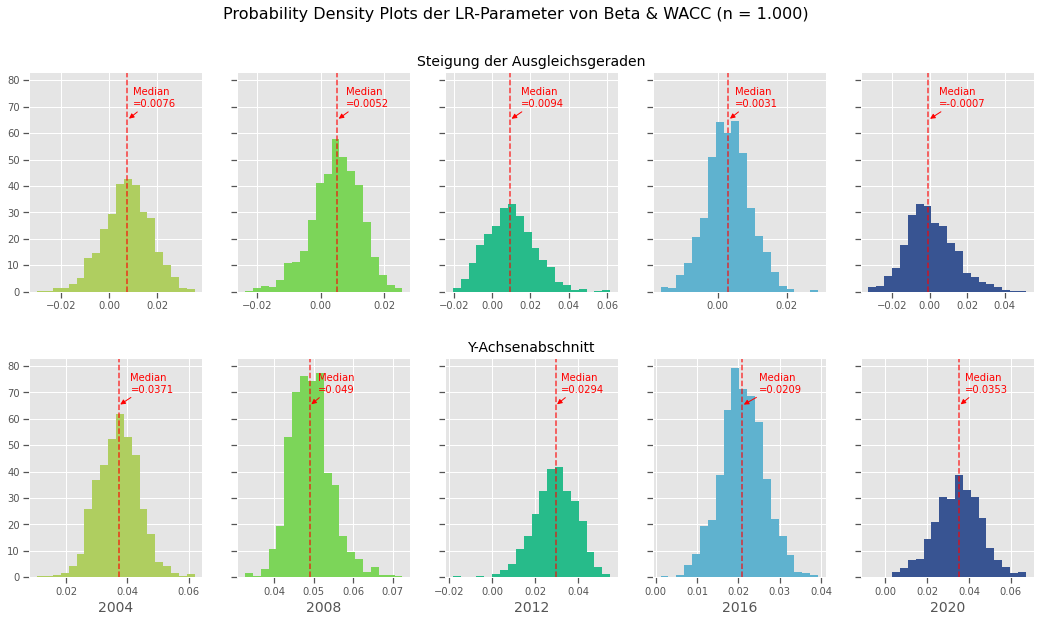

In [ ]:
# Create Figure and draw histograms #################################################################################
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (18, 9), sharey = True)

# Select figure style
plt.style.use("ggplot")

# Draw histograms for slope replicates
ax[0,0].hist(x = bs_slope_reps_04, bins = 20, color = "#AFCE60", density = True)
ax[0,1].hist(x = bs_slope_reps_08, bins = 20, color = "#7CD559", density = True)
ax[0,2].hist(x = bs_slope_reps_12, bins = 20, color = "#27BB8A", density = True)
ax[0,3].hist(x = bs_slope_reps_16, bins = 20, color = "#5FB2CF", density = True)
ax[0,4].hist(x = bs_slope_reps_20, bins = 20, color = "#385492", density = True)

# Draw histograms for intercept replicates
ax[1,0].hist(x = bs_intercept_reps_04, bins = 20, color = "#AFCE60", density = True)
ax[1,1].hist(x = bs_intercept_reps_08, bins = 20, color = "#7CD559", density = True)
ax[1,2].hist(x = bs_intercept_reps_12, bins = 20, color = "#27BB8A", density = True)
ax[1,3].hist(x = bs_intercept_reps_16, bins = 20, color = "#5FB2CF", density = True)
ax[1,4].hist(x = bs_intercept_reps_20, bins = 20, color = "#385492", density = True)

# Draw vertical lines and arrows for Median #################################################################################
# Draw vertical lines to mark the Median for each year
ax[0,0].axvline(x = np.median(bs_slope_reps_04), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[0,1].axvline(x = np.median(bs_slope_reps_08), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[0,2].axvline(x = np.median(bs_slope_reps_12), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[0,3].axvline(x = np.median(bs_slope_reps_16), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[0,4].axvline(x = np.median(bs_slope_reps_20), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)

ax[1,0].axvline(x = np.median(bs_intercept_reps_04), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[1,1].axvline(x = np.median(bs_intercept_reps_08), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[1,2].axvline(x = np.median(bs_intercept_reps_12), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[1,3].axvline(x = np.median(bs_intercept_reps_16), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[1,4].axvline(x = np.median(bs_intercept_reps_20), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)


# Make Annotations using arrow
ax[0,0].annotate(f"Median\n={round(np.median(bs_slope_reps_04), 4)}",xy = (np.median(bs_slope_reps_04), 65), xytext = (0.01, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil
ax[0,1].annotate(f"Median\n={round(np.median(bs_slope_reps_08), 4)}",xy = (np.median(bs_slope_reps_08), 65), xytext = (0.008, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil
ax[0,2].annotate(f"Median\n={round(np.median(bs_slope_reps_12), 4)}",xy = (np.median(bs_slope_reps_12), 65), xytext = (0.015, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil
ax[0,3].annotate(f"Median\n={round(np.median(bs_slope_reps_16), 4)}",xy = (np.median(bs_slope_reps_16), 65), xytext = (0.005, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil
ax[0,4].annotate(f"Median\n={round(np.median(bs_slope_reps_20), 4)}",xy = (np.median(bs_slope_reps_20), 65), xytext = (0.005, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil


ax[1,0].annotate(f"Median\n={round(np.median(bs_intercept_reps_04), 4)}",xy = (np.median(bs_intercept_reps_04), 65), xytext = (0.041, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil
ax[1,1].annotate(f"Median\n={round(np.median(bs_intercept_reps_08), 4)}",xy = (np.median(bs_intercept_reps_08), 65), xytext = (0.051, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil
ax[1,2].annotate(f"Median\n={round(np.median(bs_intercept_reps_12), 4)}",xy = (np.median(bs_intercept_reps_12), 65), xytext = (0.032, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil
ax[1,3].annotate(f"Median\n={round(np.median(bs_intercept_reps_16), 4)}",xy = (np.median(bs_intercept_reps_16), 65), xytext = (0.025, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil
ax[1,4].annotate(f"Median\n={round(np.median(bs_intercept_reps_20), 4)}",xy = (np.median(bs_intercept_reps_20), 65), xytext = (0.038, 70), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1, "color":"red"}) # Mit Pfeil


# Set subplots label sizes and titles #################################################################################
# Reduce tick label size for both y-axis and x-axis equal to 10
ax[0,0].tick_params(axis = "both", labelsize = 10)
ax[0,1].tick_params(axis = "both", labelsize = 10)
ax[0,2].tick_params(axis = "both", labelsize = 10)
ax[0,3].tick_params(axis = "both", labelsize = 10)
ax[0,4].tick_params(axis = "both", labelsize = 10)
ax[1,0].tick_params(axis = "both", labelsize = 10)
ax[1,1].tick_params(axis = "both", labelsize = 10)
ax[1,2].tick_params(axis = "both", labelsize = 10)
ax[1,3].tick_params(axis = "both", labelsize = 10)
ax[1,4].tick_params(axis = "both", labelsize = 10)

# Set title and subtitles including fontsize 
fig.suptitle("Probability Density Plots der LR-Parameter von Beta & WACC (n = 1.000)", fontsize = 16)
ax[0,2].set_title("Steigung der Ausgleichsgeraden", fontsize = 14)
ax[1,2].set_title("Y-Achsenabschnitt", fontsize = 14)

# Clearly differentiate the 3 columns by the years 2004, 2014, 2020
ax[1,0].set_xlabel("2004", fontsize = 14)
ax[1,1].set_xlabel("2008", fontsize = 14)
ax[1,2].set_xlabel("2012", fontsize = 14)
ax[1,3].set_xlabel("2016", fontsize = 14)
ax[1,4].set_xlabel("2020", fontsize = 14)

# Define margins between subplots
plt.subplots_adjust(hspace = 0.3, wspace = 0.2, bottom = 0.1)

plt.show()

### Visualising Linear Regression of Bootstrap-Replicates

The expected variability of the linear regression can be charmingly solved via a line plot. In this case, each adjustment line and each y-axis intercept corresponds to a bootstrap replica.

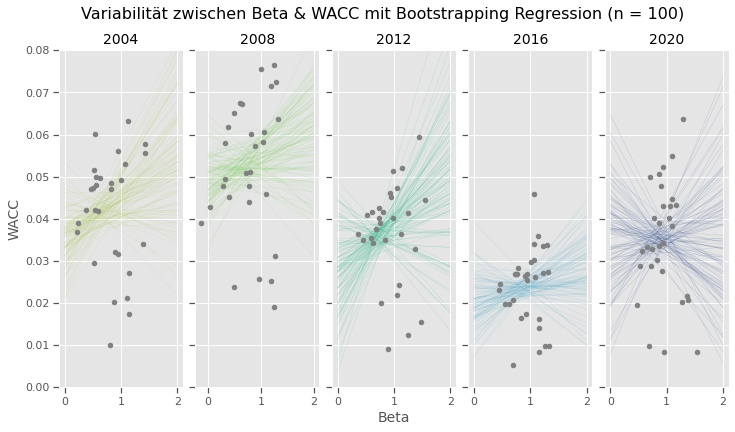

In [ ]:
import numpy as np
 
fig, ax = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (12, 6))

plt.subplots_adjust(bottom = 0.1)
 
# Compute LR-BS-Replicates for 2004 ###########################################
# Generate array for regression lines
x_04 = np.array([0, 2])
# Plot the bootstrap lines
for i in range(100):
  ax[0].plot(x_04, 
             bs_slope_reps_04[i] * x_04 + bs_intercept_reps_04[i],
             linewidth = 0.5, alpha = 0.2, color = "#AFCE60")

# Compute LR-BS-Replicates for 2008 ############################################
# Generate array for regression lines
x_08 = np.array([0, 2])
# Plot the bootstrap lines
for i in range(100):
  ax[1].plot(x_08, 
             bs_slope_reps_08[i] * x_08 + bs_intercept_reps_08[i],
             linewidth = 0.5, alpha = 0.2, color = "#7CD559")

# Compute LR-BS-Replicates for 2012 ############################################
# Generate array for regression lines
x_12 = np.array([0, 2])
# Plot the bootstrap lines
for i in range(100):
  ax[2].plot(x_12, 
             bs_slope_reps_12[i] * x_12 + bs_intercept_reps_12[i],
             linewidth = 0.5, alpha = 0.2, color = "#27BB8A")
  
# Compute LR-BS-Replicates for 2016 ############################################
# Generate array for regression lines
x_16 = np.array([0, 2])
# Plot the bootstrap lines
for i in range(100):
  ax[3].plot(x_16, 
             bs_slope_reps_16[i] * x_16 + bs_intercept_reps_16[i],
             linewidth = 0.5, alpha = 0.2, color = "#5FB2CF")
  
# Compute LR-BS-Replicates for 2020 ############################################
# Generate array for regression lines
x_20 = np.array([0, 2])
# Plot the bootstrap lines
for i in range(100):
  ax[4].plot(x_20, 
             bs_slope_reps_20[i] * x_20 + bs_intercept_reps_20[i],
             linewidth = 0.5, alpha = 0.2, color = "#385492")

# Scatterplot from original data ###############################################
ax[0].plot(betas_2004, wacc_2004, marker='.', markersize = 9, 
           linestyle='none', color = "gray")
ax[1].plot(betas_2008,wacc_2008, marker='.', markersize = 9, 
           linestyle='none', color = "gray")
ax[2].plot(betas_2012, wacc_2012, marker='.', markersize = 9, 
           linestyle='none', color = "gray")
ax[3].plot(betas_2016, wacc_2016, marker='.', markersize = 9, 
           linestyle='none', color = "gray")
ax[4].plot(betas_2020,wacc_2020, marker='.', markersize = 9, 
           linestyle='none', color = "gray")

# Make margins and label axes
ax[0].set_ylabel("WACC", fontsize = 14)

ax[2].set_xlabel("Beta", fontsize = 14)

ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2008", fontsize = 14)
ax[2].set_title("2012", fontsize = 14)
ax[3].set_title("2016", fontsize = 14)
ax[4].set_title("2020", fontsize = 14)

ax[0].set_ylim(0, 0.08, 0.02)

fig.suptitle("Variabilität zwischen Beta & WACC mit Bootstrapping Regression (n = 100)", fontsize = 16)

# Show the plot
plt.subplots_adjust(wspace = 0.1, bottom = 0.1)
plt.show()


# Save figure
fig.savefig("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(3)_Risikountersuchung_mit_Inferenzstatistik/c2_Bootstrapped_Lineare_Regression_WACC_vs_Beta.pdf", bbox_inches = "tight")